In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import mesa_reader as mr
from mesa_reader import MesaData


In [2]:
h1 = np.genfromtxt('../../Python/output_data_paper/donor_entropy_approx21plusco56_normalhelium.dat',skip_header=1)
h2 = np.genfromtxt('../entropy_normal_2.0_HELM.dat',skip_header=0)
h3 = mr.MesaData('../../../KavliSP23/Test_Ni_entropy/Relax_WD_2/WD_064.mod')


In [3]:
def create_interpolation_function(original_m, original_entropy):
    interpolation_function = interp1d(original_m, original_entropy, kind='linear', fill_value="extrapolate")
    return interpolation_function

In [122]:
h1[6,2]

10000000.0

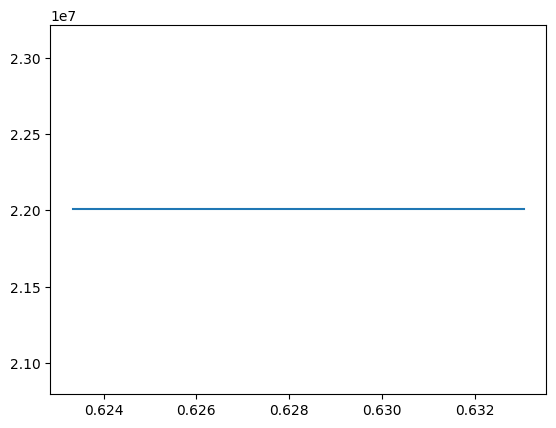

In [78]:
plt.plot((1-h1[10:25,0])*0.64,h1[10:25,2])


In [87]:
np.argmax((h2[:,1]))

962

In [4]:
#Interpolating functions for entropy using older mass coordinates
entropy=create_interpolation_function((h2[:,0])*0.64,h2[:,1])
temp_donor=create_interpolation_function((1.000-h1[:,0])*0.64,h1[:,2])
temp_mesa=create_interpolation_function((1.000-h3.dq.cumsum())*0.64,np.power(10,np.log10(2.71828)*h3.lnT))


In [5]:
new_m = np.linspace(0., 0.64, 970)  #New mass coordinate range



In [6]:
#New entropies
new_entropy = entropy(new_m)
new_temp_donor = temp_donor(new_m)
new_temp_mesa = temp_mesa(new_m)



Text(0.5, 0, 'mass coordinate')

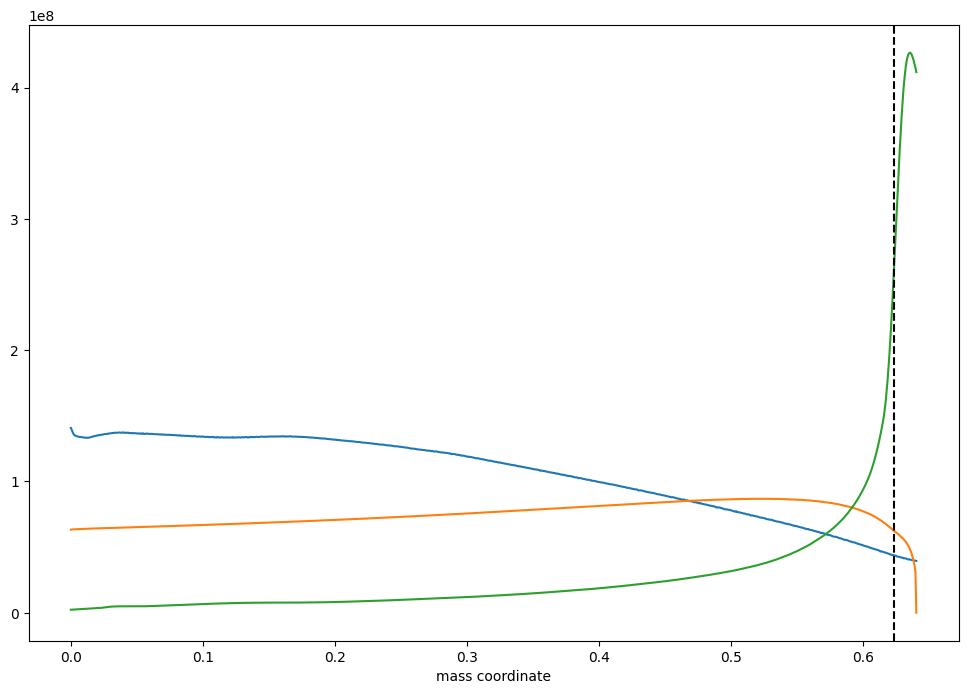

In [7]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(new_m,new_temp_donor)
ax.plot(new_m,new_temp_mesa)
ax.plot(new_m,new_entropy)
ax.axvline(x=0.623,color='black',linestyle='--')
#ax.axvline(x=h2[962,0]*0.64,color='black',linestyle='--')
plt.xlabel("mass coordinate")



In [8]:
from scipy.signal import savgol_filter
new_temp_ratio_smooth=savgol_filter((new_temp_donor/new_temp_mesa),31,3)  #Smoothing the difference of entropies
new_temp_ratio=(new_temp_donor/new_temp_mesa) 

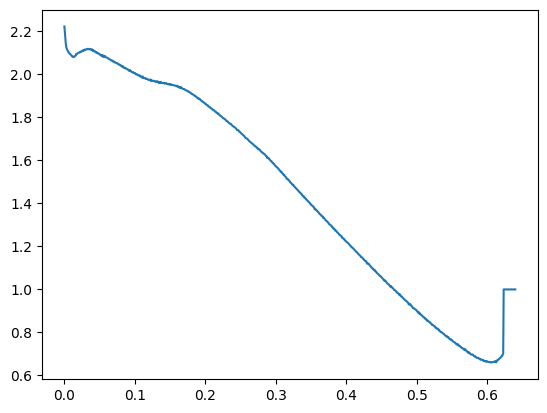

In [11]:
plt.plot(new_m,new_temp_ratio)


In [10]:
ind_min=np.where(new_m>=0.623)
print(ind_min[0][0])
new_temp_ratio[ind_min[0][0]:]=1

944


(0.0, 0.1)

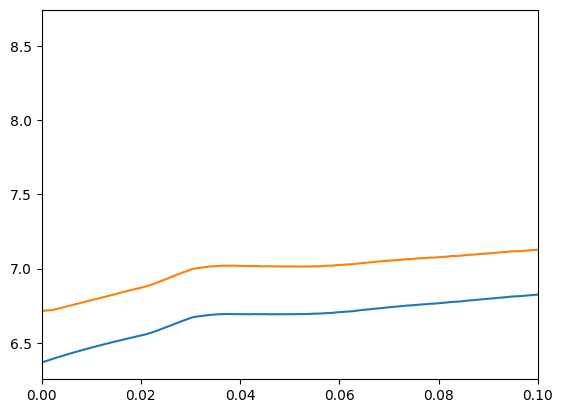

In [17]:
plt.plot(new_m,np.log10(new_entropy))
plt.plot(new_m,np.log10(rescaled_entropy))
plt.xlim(0,0.1)


In [13]:
rescaled_entropy=new_temp_ratio*new_entropy  #The rescaled new entropy

In [33]:
q_zones=1-new_m/0.64
q_zones=q_zones/q_zones.max()
print(q_zones)







[1.         0.99896801 0.99793602 0.99690402 0.99587203 0.99484004
 0.99380805 0.99277606 0.99174407 0.99071207 0.98968008 0.98864809
 0.9876161  0.98658411 0.98555212 0.98452012 0.98348813 0.98245614
 0.98142415 0.98039216 0.97936017 0.97832817 0.97729618 0.97626419
 0.9752322  0.97420021 0.97316821 0.97213622 0.97110423 0.97007224
 0.96904025 0.96800826 0.96697626 0.96594427 0.96491228 0.96388029
 0.9628483  0.96181631 0.96078431 0.95975232 0.95872033 0.95768834
 0.95665635 0.95562436 0.95459236 0.95356037 0.95252838 0.95149639
 0.9504644  0.9494324  0.94840041 0.94736842 0.94633643 0.94530444
 0.94427245 0.94324045 0.94220846 0.94117647 0.94014448 0.93911249
 0.9380805  0.9370485  0.93601651 0.93498452 0.93395253 0.93292054
 0.93188854 0.93085655 0.92982456 0.92879257 0.92776058 0.92672859
 0.92569659 0.9246646  0.92363261 0.92260062 0.92156863 0.92053664
 0.91950464 0.91847265 0.91744066 0.91640867 0.91537668 0.91434469
 0.91331269 0.9122807  0.91124871 0.91021672 0.90918473 0.9081

In [164]:
combined_array = np.column_stack((np.flipud(q_zones),rescaled_entropy))
dat_file_path = '../rescaled_entropy_normal_2.0_HELM.dat'
np.savetxt(dat_file_path, combined_array, delimiter='\t', header='qm\theat', comments='')